In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import roc_auc_score as rs
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
df = pd.read_csv('/Users/tashaygreen/Documents/Machine Learning for Cities/Project/Data/merged_data_1.1.csv')

In [3]:
df.head()

,Unnamed: 0,id,BoroCT2010,n_report,DBN,school_distance,n_school,subway_distance,n_tobacco,Enrollment,...,Percent Hispanic,Percent Asian,% Female,% Poverty,MHI,Total Population,type,latitude,longitude,have_sold
0,0,19157,5000900,0.0,24Q600,2826.764130,0.0,79.859155,3,1575,...,0.757,0.112,0.377778,0.811429,56192,2112,GROCERY SUPERMARKET,40.640561,-74.082207,0
1,1,18026,5000900,0.0,10X225,1703.127328,1.0,924.970954,3,427,...,0.700,0.009,0.674603,1.000000,56192,2112,CONVENIENCE STORE,40.641998,-74.078975,0
2,2,12113,5000900,0.0,28Q690,2929.402252,0.0,5998.612261,3,589,...,0.195,0.104,0.463497,0.728353,56192,2112,GROCERY SUPERMARKET,40.640561,-74.082207,0
3,3,13601,5007400,0.0,15K448,1740.529846,0.0,2489.816362,2,415,...,0.422,0.046,0.508100,0.684831,65559,4693,GROCERY SUPERMARKET,40.591647,-74.067662,0
4,4,10482,5007400,0.0,23K493,630.587028,0.0,941.382096,2,307,...,0.114,0.010,0.387622,0.856678,65559,4693,GROCERY SUPERMARKET,40.595713,-74.063245,0


In [4]:
df.dtypes

Unnamed: 0                      int64
id                              int64
BoroCT2010                      int64
n_report                      float64
DBN                            object
school_distance               float64
n_school                      float64
subway_distance               float64
n_tobacco                       int64
Enrollment                      int64
Student Achievement Rating     object
Percent White                 float64
Percent Black                 float64
Percent Hispanic              float64
Percent Asian                 float64
% Female                      float64
% Poverty                     float64
MHI                             int64
Total Population                int64
type                           object
latitude                      float64
longitude                     float64
have_sold                       int64
dtype: object

### Create Classes Based on # Reports

In [5]:
df['class'] = df['n_report'].apply(lambda x: 1 if x == 0 
                                    else 2 if x > 0 and x <= 2 
                                    else 3 if x > 2 and x <= 10 
                                    else 4 if x >10 else 0)

In [6]:
pd.value_counts(df['class'])

1    8934
2    1349
3     247
4       6
Name: class, dtype: int64

In [7]:
df.drop('have_sold', axis=1, inplace=True)

### Export csv

In [8]:
# df.to_csv('/Users/tashaygreen/Documents/Machine Learning for Cities/Project/Data/New_Classes.csv')

### Multiclass

In [9]:
df.head()

,Unnamed: 0,id,BoroCT2010,n_report,DBN,school_distance,n_school,subway_distance,n_tobacco,Enrollment,...,Percent Hispanic,Percent Asian,% Female,% Poverty,MHI,Total Population,type,latitude,longitude,class
0,0,19157,5000900,0.0,24Q600,2826.764130,0.0,79.859155,3,1575,...,0.757,0.112,0.377778,0.811429,56192,2112,GROCERY SUPERMARKET,40.640561,-74.082207,1
1,1,18026,5000900,0.0,10X225,1703.127328,1.0,924.970954,3,427,...,0.700,0.009,0.674603,1.000000,56192,2112,CONVENIENCE STORE,40.641998,-74.078975,1
2,2,12113,5000900,0.0,28Q690,2929.402252,0.0,5998.612261,3,589,...,0.195,0.104,0.463497,0.728353,56192,2112,GROCERY SUPERMARKET,40.640561,-74.082207,1
3,3,13601,5007400,0.0,15K448,1740.529846,0.0,2489.816362,2,415,...,0.422,0.046,0.508100,0.684831,65559,4693,GROCERY SUPERMARKET,40.591647,-74.067662,1
4,4,10482,5007400,0.0,23K493,630.587028,0.0,941.382096,2,307,...,0.114,0.010,0.387622,0.856678,65559,4693,GROCERY SUPERMARKET,40.595713,-74.063245,1


In [10]:
df.dropna(how='any', inplace=True)

In [11]:
achievement = {
    'Not Meeting Target':1,
    'Approaching Target':2,
    'Meeting Target':3,
    'Exceeding Target':4
}

In [12]:
df['Achievement'] = df['Student Achievement Rating'].map(achievement)

In [13]:
df.head()

,Unnamed: 0,id,BoroCT2010,n_report,DBN,school_distance,n_school,subway_distance,n_tobacco,Enrollment,...,Percent Asian,% Female,% Poverty,MHI,Total Population,type,latitude,longitude,class,Achievement
0,0,19157,5000900,0.0,24Q600,2826.764130,0.0,79.859155,3,1575,...,0.112,0.377778,0.811429,56192,2112,GROCERY SUPERMARKET,40.640561,-74.082207,1,2
1,1,18026,5000900,0.0,10X225,1703.127328,1.0,924.970954,3,427,...,0.009,0.674603,1.000000,56192,2112,CONVENIENCE STORE,40.641998,-74.078975,1,2
2,2,12113,5000900,0.0,28Q690,2929.402252,0.0,5998.612261,3,589,...,0.104,0.463497,0.728353,56192,2112,GROCERY SUPERMARKET,40.640561,-74.082207,1,2
3,3,13601,5007400,0.0,15K448,1740.529846,0.0,2489.816362,2,415,...,0.046,0.508100,0.684831,65559,4693,GROCERY SUPERMARKET,40.591647,-74.067662,1,4
4,4,10482,5007400,0.0,23K493,630.587028,0.0,941.382096,2,307,...,0.010,0.387622,0.856678,65559,4693,GROCERY SUPERMARKET,40.595713,-74.063245,1,3


### Multiclass Decision Tree

In [14]:
# Segmenting data for test train split
X = df[['school_distance','n_school','subway_distance','n_tobacco','Enrollment',
     'Percent White','Percent Black','Percent Hispanic','Percent Asian','% Female',
     '% Poverty','MHI','Total Population','Achievement']]

y = df['class']

y_binary = label_binarize(y, classes=[1, 2, 3, 4])

# #Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size = .3, random_state=999)

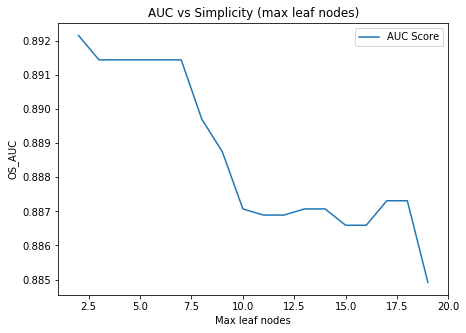

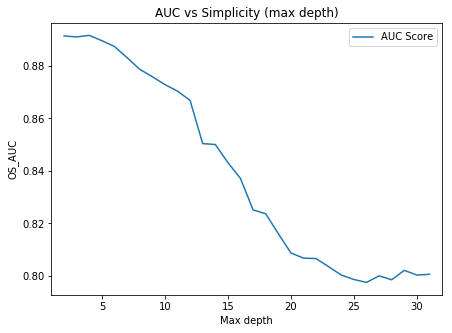

In [15]:
# function to create plot
def get_plot(X_train):
    # max leaf
    
    AUC=[]
    #dt = DTC().fit(X_train, y_train)
    #print dt.tree_.max_depth
    for i in range(2,20,1):    
        classifier= DTC(max_leaf_nodes=i)
        classifier.fit(X_train, y_train)
        pred=classifier.predict(X_test)
        AUC.append(rs(y_test,pred,average='micro'))

    plt.figure(figsize=(7,5))
    plt.plot(range(2,20,1),AUC,label='AUC Score')
    plt.xlabel("Max leaf nodes")
    plt.ylabel("OS_AUC")
    plt.title("AUC vs Simplicity (max leaf nodes)")
    plt.xlim(1,20)
    plt.legend()
    plt.show()
    
    # max depth
    AUC=[]
    dt = DTC().fit(X_train, y_train)
    md = dt.tree_.max_depth
    for i in range(2,md,1):    
        classifier= DTC(max_depth=i)
        classifier.fit(X_train, y_train)
        pred=classifier.predict(X_test)
        AUC.append(rs(y_test,pred,average='micro'))

    plt.figure(figsize=(7,5))
    plt.plot(range(2,md,1),AUC,label='AUC Score')
    plt.xlabel("Max depth")
    plt.ylabel("OS_AUC")
    plt.title("AUC vs Simplicity (max depth)")
    plt.xlim(1,md)
    plt.legend()
    plt.show()
    
get_plot(X_train)

In [16]:
# here I don't binarize the y so that I can show the classes on the tree
# and add some metrics: precision and recall
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=1000)

def get_metrics(X_train):
    dt = DTC(max_depth=5)
    dt.fit(X_train, y_train)
    y_pred= dt.predict(X_test)
    accuracy = dt.score(X_test,y_test)
    fscore = f1_score(y_test, y_pred, average="macro")
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")   

    print "OS accuracy: " + str(accuracy)
    print "OS precision: " + str(precision)
    print "OS recall: " + str(recall)
    print "OS f1-score: " + str(fscore)
    return dt

dt1=get_metrics(X_train)

OS accuracy: 0.846872753415
OS precision: 0.233378459687
OS recall: 0.249547928034
OS f1-score: 0.230637645065


/Users/tashaygreen/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/tashaygreen/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
print "Important Features for Continuous Data"
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt1.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]
important_features_cont = Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]
important_features_cont

Important Features for Continuous Data


,variables,importance
11,MHI,0.414668
12,Total Population,0.127434
0,school_distance,0.12632
2,subway_distance,0.0979377
10,% Poverty,0.0688126


In [18]:
def get_metrics_with_small_attributes(X_train, important_features, max_depth=None, max_leaf=None):
    important_features = important_features.variables
    X_train_simple = X_train[important_features]
    X_test_simple = X_test[important_features]

    dt = DTC(max_depth=max_depth, max_leaf_nodes=max_leaf)
    dt.fit(X_train_simple, y_train)
    y_pred= dt.predict(X_test_simple)
    accuracy = dt.score(X_test_simple,y_test)
    fscore = f1_score(y_test, y_pred, average="macro")
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")   

    print "OS accuracy: " + str(accuracy)
    print "OS precision: " + str(precision)
    print "OS recall: " + str(recall)
    print "OS f1-score: " + str(fscore)

    return dt

print "Metrics with 5 attributes and max_depth = 4"
dt_small1 = get_metrics_with_small_attributes(X_train, important_features_cont, 4, None)
print ""
print "Metrics with 5 attributes and max_leaf_nodes = 6"
dt_small2 = get_metrics_with_small_attributes(X_train, important_features_cont, None, 6)

Metrics with 5 attributes and max_depth = 4
OS accuracy: 0.849029475198
OS precision: 0.254292747358
OS recall: 0.250181909437
OS f1-score: 0.230976578033

Metrics with 5 attributes and max_leaf_nodes = 6
OS accuracy: 0.850107836089
OS precision: 0.212603380079
OS recall: 0.249894336433
OS f1-score: 0.229745482806


TREE WITH MAX DEPTH = 4


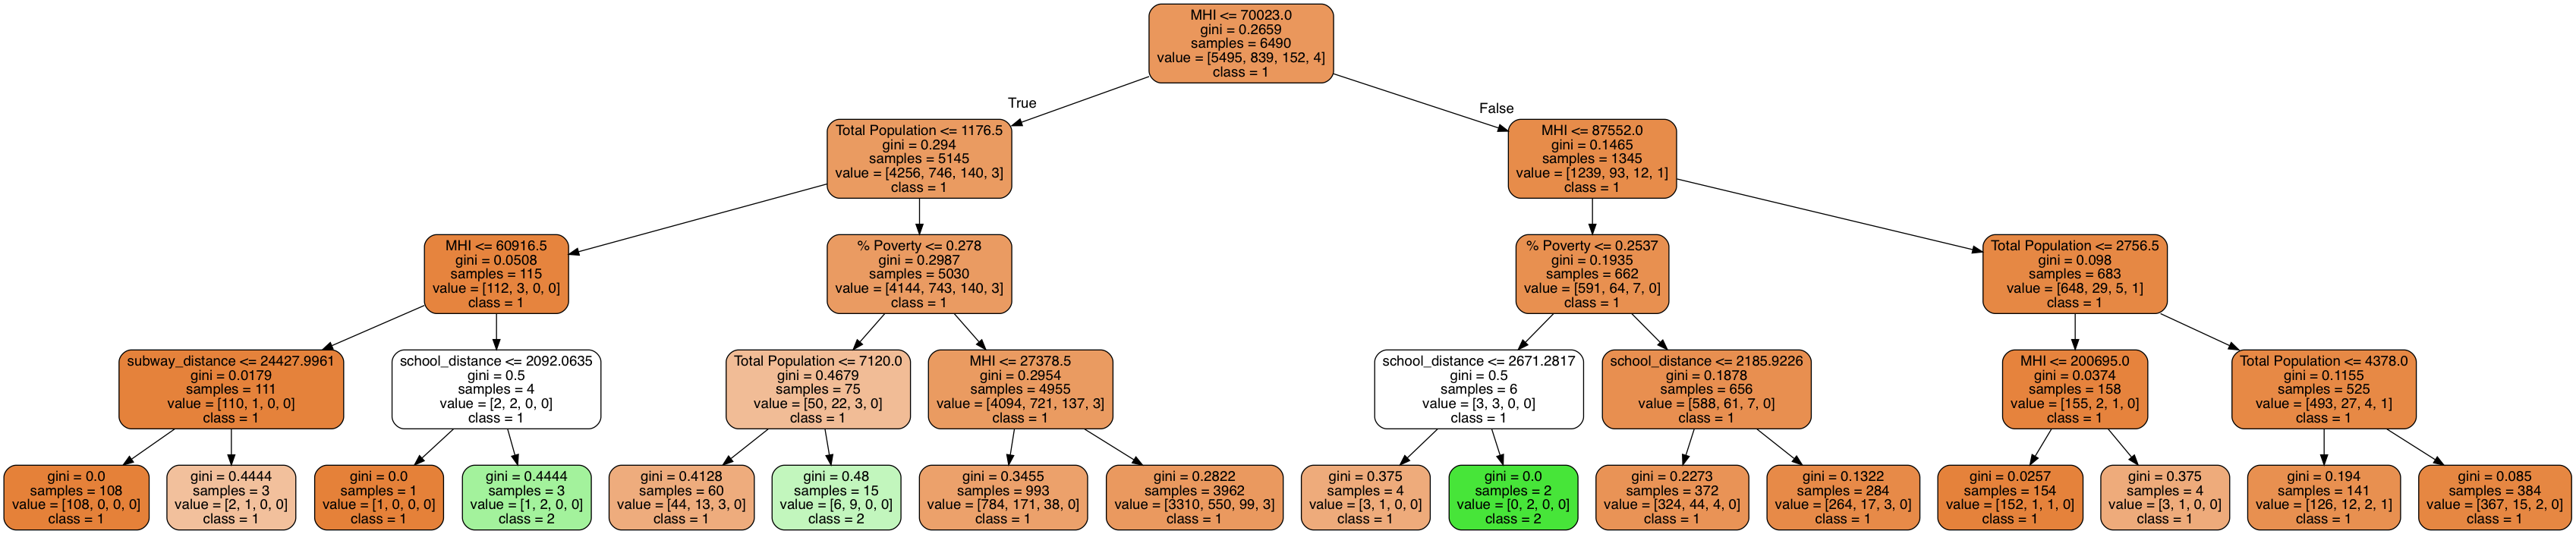

In [19]:
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(dt_small1, out_file=dot_data,  
                         feature_names=important_features_cont.variables.values,  
                         class_names=['1','2','3','4'],  
                         filled=True, rounded=True) 
                         #special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
print "TREE WITH MAX DEPTH = 4"
Image(graph.create_png()) 

TREE WITH MAX LEAF = 6


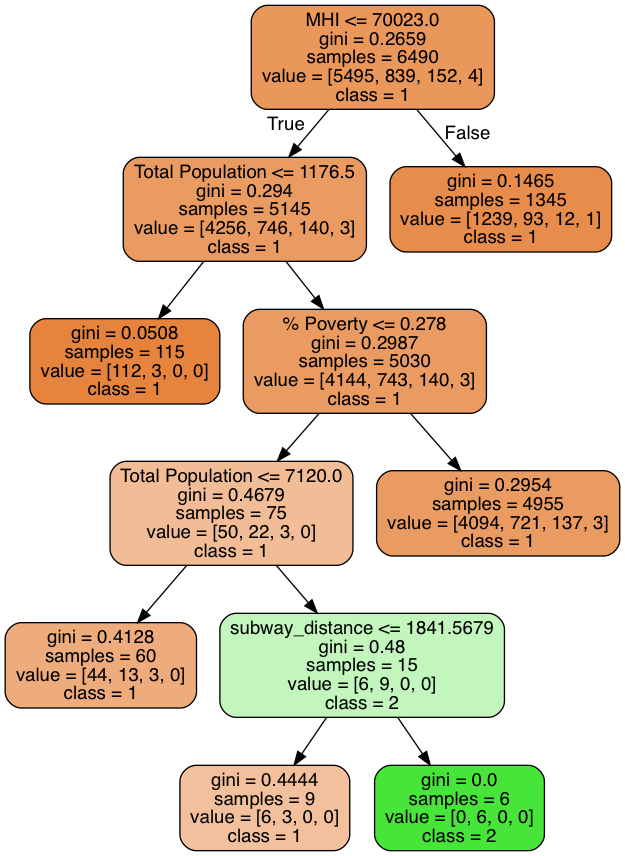

In [20]:
from sklearn.externals.six import StringIO  
from sklearn import tree
from IPython.display import Image  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(dt_small2, out_file=dot_data,  
                         feature_names=important_features_cont.variables.values,  
                         class_names=['1','2','3','4'],  
                         filled=True, rounded=True) 
                         #special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
print "TREE WITH MAX LEAF = 6"
Image(graph.create_png())  